<a href="https://colab.research.google.com/github/byrocuy/REA_AI_Bootcamp/blob/main/week-4/project/pipeline_and_gradio_REA3X33Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Image Classification using Pipeline dan Gradio

**Description:**

Welcome to your new assignment! In this project, you will have the opportunity to apply the knowledge and skills you've learned in class. The task at hand is to create an image classification project that predicts a person's age based on their photograph. You will be utilizing the power of machine learning pipelines to streamline your workflow and effectively manage the different stages of this project, from data preprocessing to model training and evaluation.

Remember, the goal of this assignment is not just to build a model that makes accurate predictions, but also to understand the process of developing a machine-learning pipeline and the role each component plays in this process.

We encourage you to be creative, explore different strategies, and most importantly, have fun while learning. We can't wait to see the innovative solutions you come up with! Best of luck!

## Student Identity

In [ ]:
# @title #### Student Identity
student_id = "REA3X33Z" # @param {type:"string"}
name = "Roby Attoillah" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1h1bPsPpq-xZfPriBezE0piEyS9Ptkl_k?usp=sharing"  # @param {type:"string"}

## Installation and Import Package

In [ ]:
# Install necessary packages
!pip install rggrader transformers -q

from rggrader import submit, submit_image
import torch
import requests
import numpy as np

from PIL import Image
from io import BytesIO
from IPython.display import display
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Put your code here:

# ---- End of your code ----

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.5 MB/s eta 0:00:00


## Pipeline

**Task 1: Image Classification using Hugging Face's Model**

In this first task, your task is to develop an image classification pipeline that takes **an image URL as input**, displays the image, and uses the Hugging Face's model to predict the age of the person in the image. You can get the model [here](https://huggingface.co/nateraw/vit-age-classifier).

Here are the key steps that you might be able to follow:

1. **Image URL Input:** Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2. **Image Display:** Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3. **Model Loading and Prediction:** Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4. **Output Display:** Display the output from the model in a clear and understandable manner.

## Submission

- What percentage is the person in this picture (https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80) is between age of "3-9"?

Submit in the numeric format up to 5 digits behind the decimal point. For example in below output:

```
{'0-2': '0.00152',
 '3-9': '0.00105',
 '10-19': '0.02567',
 '20-29': '3.32545',
 '30-39': '51.75200',
 '40-49': '40.24234',
 '50-59': '4.47803',
 '60-69': '0.17092',
 'more than 70': '0.00304'}
```

The answer would be `0.00105`.

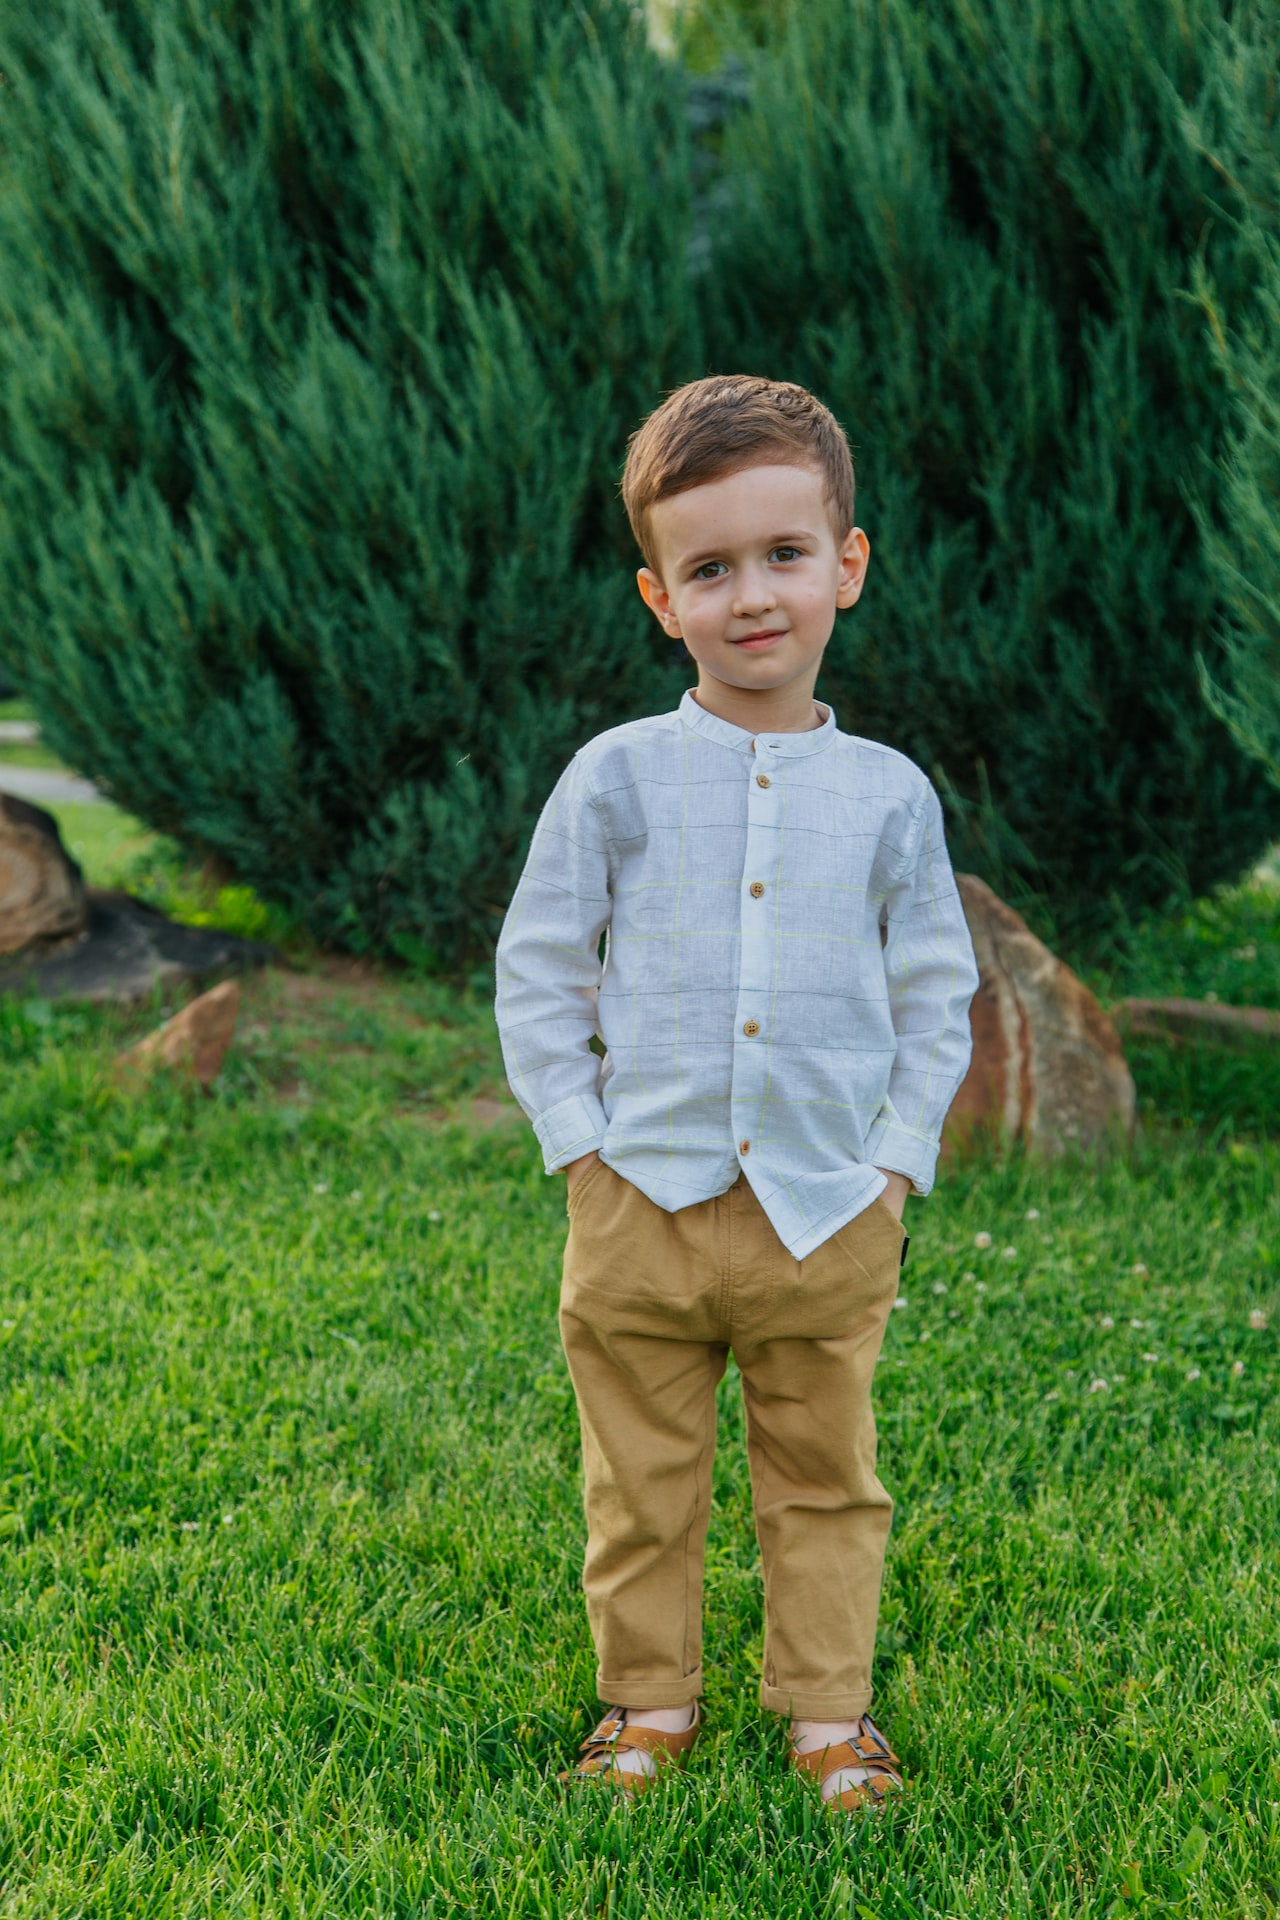

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


The probability that the person is between age of 3-9 is: 80.55307006835938%


In [ ]:
# @title #### 01. Image Classification using Hugging Face's Model
'''
Here are the key steps that you might be able to follow:

1 - Image URL Input: Your program should accept an image URL as input. Make sure to handle potential issues with invalid URLs or inaccessible images.
2 - Image Display: Display the image from the URL in your notebook. This will provide a visual confirmation that the correct image is being processed.
3 - Model Loading and Prediction: Load the 'nateraw/vit-age-classifier' model from Hugging Face's model hub and pass the image URL to the model to obtain the prediction. The model should predict the age of the person in the image.
4 - Output Display: Display the output from the model in a clear and understandable manner.
'''

# Put your code here:

def get_images(url):
  response = requests.get(url)
  return Image.open(BytesIO(response.content))

url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"

# Read and display image
try:
  img = get_images(url)
  display(img)
except Exception as e :
  print("Exception: ", e, " at ",url)

# Init model, transforms
model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

# transform and predict the input
inputs = transforms(img, return_tensors='pt')
output = model(**inputs)

# Predicted Class probability
proba = output.logits.softmax(1)

# Predicted Classes
preds = proba.argmax(1)

# Get label in the model config
id = model.config.id2label.values()

# Convert predicted class probability to percentage form and zip with the label
proba_percent = proba[0].detach().numpy() * 100
pred_dict = dict(zip(id, np.round(proba_percent, 5)))

print(f'The probability that the person is between age of 3-9 is: {pred_dict["3-9"]}%')

# ---- End of your code ----

In [ ]:
# Submit Method
assignment_id = "00_pipeline_and_gradio"
question_id = "01_image_classification_using_hugging_faces_model"
answer = str(pred_dict['3-9']) # Put your answer here
print(answer)
submit(student_id, name, assignment_id, answer, question_id, drive_link)

80.55307


'Assignment successfully submitted'

## Pipeline and Gradio

**Task 2: Image Classification using Hugging Face's Model and Gradio**

In this second task, you will create a user-friendly interface using Gradio for your image classification pipeline that you created in Task 1. The difference with task 1 is, that in this task, you use **image files as input**, process them through the Hugging Face model, and display predictions output. The output displayed is **only the results with the highest `score`**.

Here are the key steps that you might be able to follow:

1. **Image Input:** Create a function to accept an image file as input. The image should be in a format that can be processed by the model.
2. **Model Loading and Prediction:** Load the model from Hugging Face's model hub and pass the image to the model to obtain the prediction. The model predicts the age of the person in the image.
3. **Gradio Interface:** Use Gradio to create a user-friendly interface for your application. The interface should allow users to upload an image file, and it should display the model's output in a clear and understandable manner.
4. **Interface Launch:** Launch the Gradio interface. Make sure that the interface is accessible and easy to use.

## Submisssion

![Upload colab](https://lh3.googleusercontent.com/drive-viewer/AITFw-wMsYV4Al6vaol_q2ipMbrdfZdBm4VNaFGjeBv6oW42hGuwoM-Hg4jDc3dRM10IjZy2LmSY1F8btONIJiYEQMGUvoxgaw=s2560)

You need to submit screenshot of your Gradio's app. In Google Colab you can just use the "Folder" sidebar and click the upload button. Make sure your screenshot match below requirements:

- You should upload a person's image to that app
- The score should be included at the screenshot


In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
# @title #### 02. Image Classification using Hugging Face's Model and Gradio
import json
import gradio as gr

# Put your code here:

def get_example():
  url = "https://images.unsplash.com/photo-1596392927852-2a18c336fb78?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1280&q=80"
  img = get_images(url)
  img.save("person.jpg")

def get_prediction(img):
  device = "cuda:0" if torch.cuda.is_available() else "cpu"

  model = ViTForImageClassification.from_pretrained('nateraw/vit-age-classifier')
  transforms = ViTFeatureExtractor.from_pretrained('nateraw/vit-age-classifier')

  # transform and predict the input
  inputs = transforms(img, return_tensors='pt').to(device)
  model = model.to(device)
  output = model(**inputs)

  # Predicted Class probability
  proba = output.logits.softmax(1)

  # Predicted Classes
  preds = proba.argmax(1)

  return {
      "score": proba[0][preds.item()].item(),
      "label": model.config.id2label[preds.item()]
      }


get_example()
app = gr.Interface(
    get_prediction,
    "image",
    outputs = gr.outputs.JSON(),
    title = "Age Classifier",
    description = "Predict age of a person from an image.",
    examples = ['person.jpg']
)

app.launch(debug=True)

# ---- End of your code ----

<ipython-input-61-11afdff2437e>:39: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.JSON(),


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Example of Expected Output:

![gradio-result](https://storage.googleapis.com/rg-ai-bootcamp/project-3-pipeline-and-gradio/gradio-result.png)

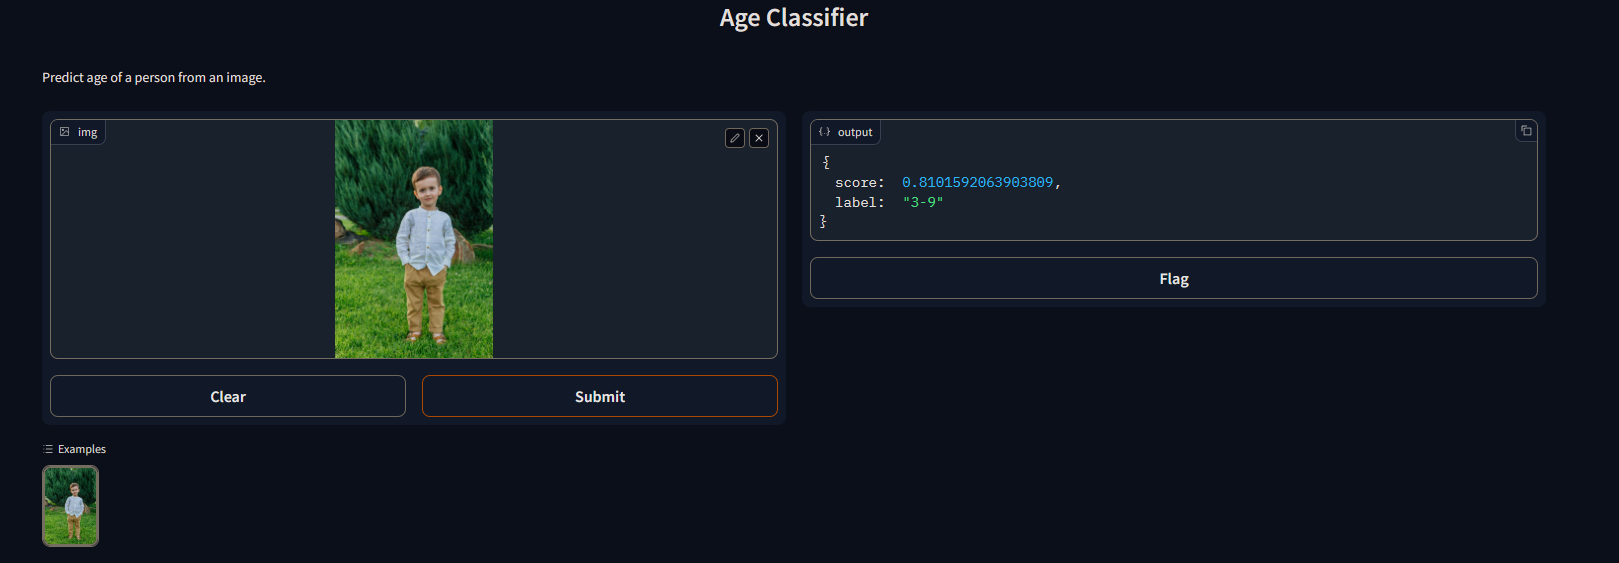

In [ ]:
display(Image.open('./submission.png'))

In [ ]:
# Submit Method
question_id = "02_image_classification_using_hugging_faces_model_and_gradio"
submit_image(student_id, question_id, './submission.png')


'Assignment successfully submitted'

> Note: If your submission for Task-2 did not run (After you run it never changes from "*" to a number), stop the Code block that's running the Gradio app, then the submission will run. To stop the Code block, you can click on the Code block and then click the stop button.